# 1. Importing Libraries 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


# 2. Read and Understand Data

In [7]:
country = pd.read_csv('/Users/pulkitgupta/Desktop/UpGrad Study Material/Course 2/Clustering assigment /Country-data.csv')

In [8]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [11]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Converting Exports, Imports and Health as they have been given as a Percentage measure of GDPP

In [12]:
country['exports'] = country['exports'] * country['gdpp']/100
country['imports'] = country['imports'] * country['gdpp']/100
country['health'] = country['health'] * country['gdpp']/100

In [13]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# 3. Data Visualisation (Unvivariate, Plotting Pairplots and Correlation matrix)

## As this data helps in concluding which countries should be provided help, so we have created dataframes depticting the increasing and decreasing order of various factors to get an initial impression about which countries top 5 should be provided help
## For instance, from commom understanding we know life expectancy could be a good measure, if it more it is believed that health care facilities in that country are better than those where life expectancy is less

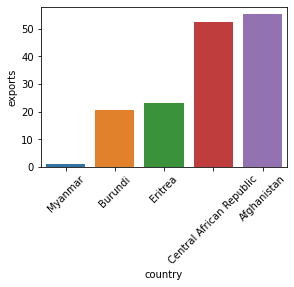

In [14]:
plt.figure(figsize=[15,10])
bottom_exports = country[['country','exports']].sort_values(by = 'exports', ascending = True).head()
plt.subplot(3,3,1)
plt.xticks(rotation=45)
sns.barplot(x = 'country', y = 'exports', data = bottom_exports)
plt.show()

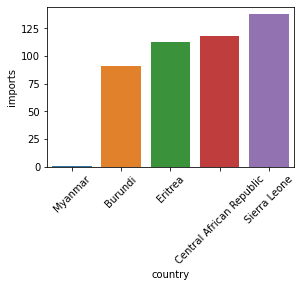

In [15]:
plt.figure(figsize=[15,10])
bottom_imports = country[['country','imports']].sort_values(by = 'imports', ascending = True).head()
plt.subplot(3,3,2)
plt.xticks(rotation=45)
sns.barplot(x = 'country', y = 'imports', data = bottom_imports)
plt.show()

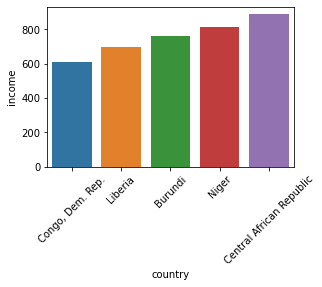

In [16]:
plt.figure(figsize=[15,10])
bottom_income = country[['country','income']].sort_values(by = 'income', ascending = True).head()
plt.subplot(3,3,3)
plt.xticks(rotation=45)
sns.barplot(x = 'country', y = 'income', data = bottom_income)
plt.show()

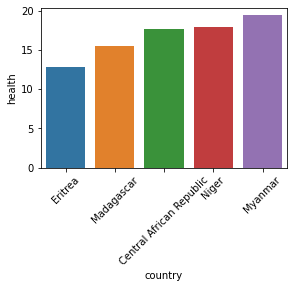

In [17]:
plt.figure(figsize=[15,10])
bottom_health = country[['country','health']].sort_values(by = 'health', ascending = True).head()
plt.subplot(3,3,4)
plt.xticks(rotation=45)
sns.barplot(x = 'country', y = 'health', data = bottom_health)
plt.show()

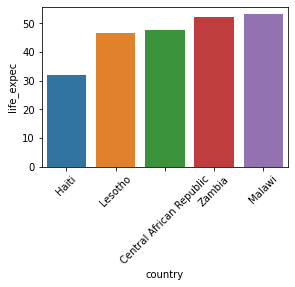

In [18]:
plt.figure(figsize=[15,10])
bottom_life_expec = country[['country','life_expec']].sort_values(by = 'life_expec', ascending = True).head()
plt.subplot(3,3,5)
plt.xticks(rotation=45)
sns.barplot(x = 'country', y = 'life_expec', data = bottom_life_expec)
plt.show()

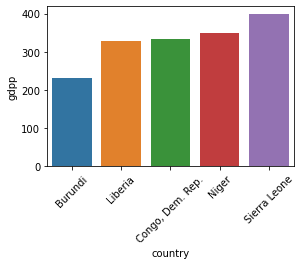

In [19]:
plt.figure(figsize=[15,10])
bottom_gdpp = country[['country','gdpp']].sort_values(by = 'gdpp', ascending = True).head()
plt.subplot(3,3,6)
plt.xticks(rotation=45)
sns.barplot(x = 'country', y = 'gdpp', data = bottom_gdpp)
plt.show()

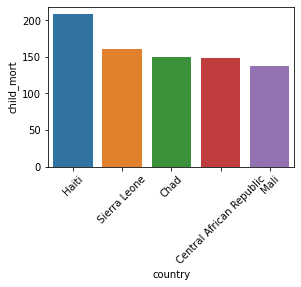

In [20]:
plt.figure(figsize=[15,10])
top_child_mort = country[['country','child_mort']].sort_values(by = 'child_mort', ascending = False).head()
plt.subplot(3,3,7)
plt.xticks(rotation=45)
sns.barplot(x = 'country', y = 'child_mort', data = top_child_mort)
plt.show()

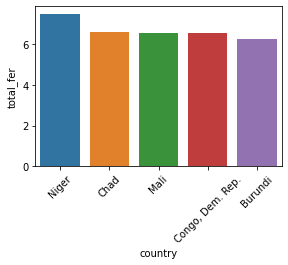

In [21]:
plt.figure(figsize=[15,10])
top_total_fer = country[['country','total_fer']].sort_values(by = 'total_fer', ascending = False).head()
plt.subplot(3,3,8)
plt.xticks(rotation=45)
sns.barplot(x = 'country', y = 'total_fer', data = top_total_fer)
plt.show()

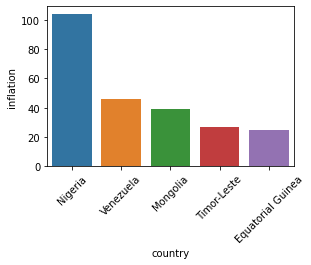

In [22]:
plt.figure(figsize=[15,10])
top_inflation = country[['country','inflation']].sort_values(by = 'inflation', ascending = False).head()
plt.subplot(3,3,9)
plt.xticks(rotation=45)
sns.barplot(x = 'country', y = 'inflation', data = top_inflation)
plt.show()

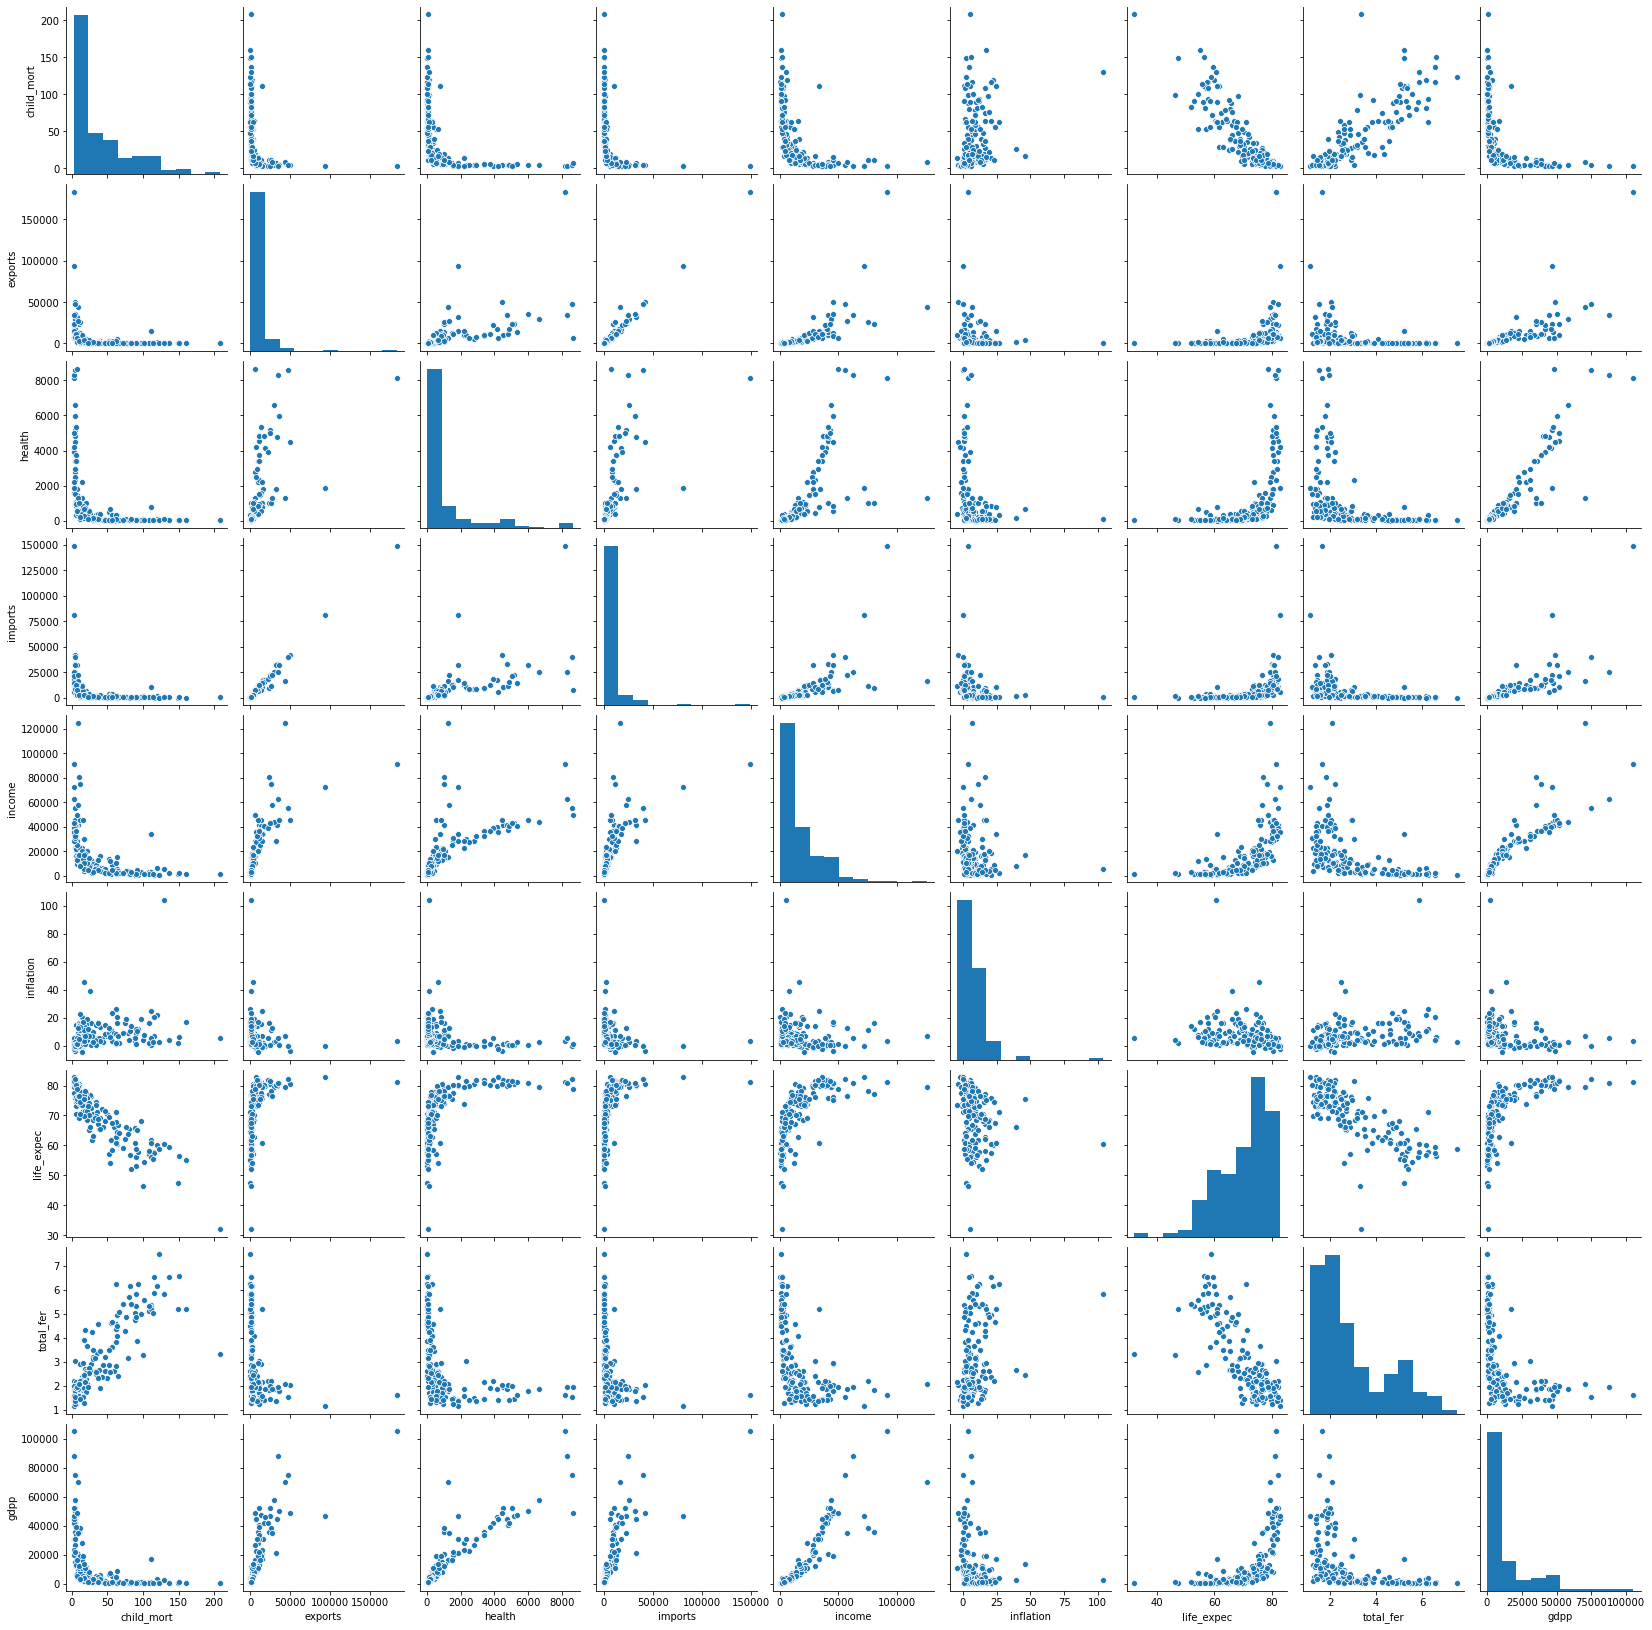

In [23]:
sns.pairplot(data = country)
plt.show()

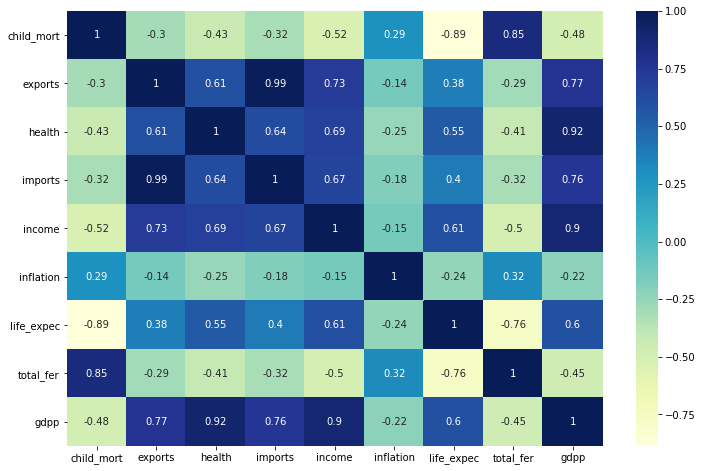

In [24]:
plt.figure(figsize = [12,8])
corre = country.corr()
sns.heatmap(corre, annot = True,cmap="YlGnBu")
plt.show()

## Inferences:
1. Highest correlation between imports and exports (case for developed countries)
2. High correaltion of GDPP with health, income (case for developed countries)
3. High correaltion between total_fer and child_mort (case for under developed countries)
....like wise there are many factors which a high positive correlation and negative correlation, and this could be understood why. Data dictionary provided explains what each factor means and the relation between factors becomes intuitive 

# 4. Outlier Analysis

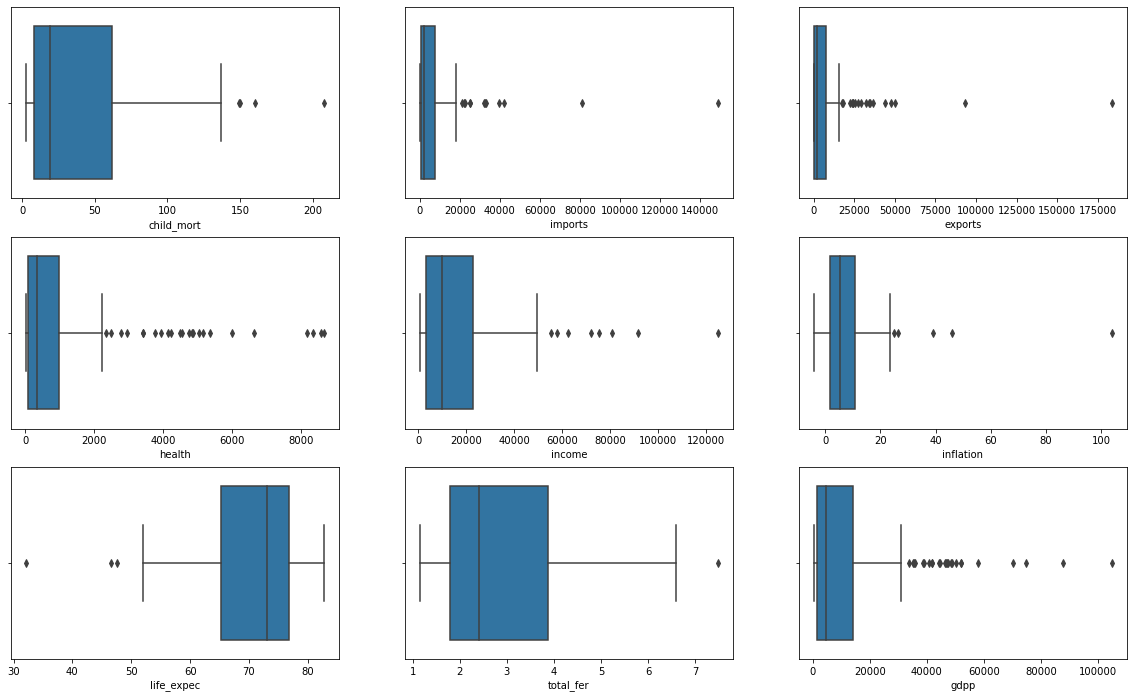

In [25]:
plt.figure(figsize = [20,12])

plt.subplot(3,3,1)
sns.boxplot(country['child_mort'])

plt.subplot(3,3,2)
sns.boxplot(country['imports'])

plt.subplot(3,3,3)
sns.boxplot(country['exports'])

plt.subplot(3,3,4)
sns.boxplot(country['health'])

plt.subplot(3,3,5)
sns.boxplot(country['income'])

plt.subplot(3,3,6)
sns.boxplot(country['inflation'])

plt.subplot(3,3,7)
sns.boxplot(country['life_expec'])

plt.subplot(3,3,8)
sns.boxplot(country['total_fer'])

plt.subplot(3,3,9)
sns.boxplot(country['gdpp'])
plt.show()

In [26]:
# As we see that there are many outliers so we will cap the outliers Accordingly between 5 and 95 percentiles.

Q1 = country.child_mort.quantile(0.05)
Q3 = country.child_mort.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.child_mort >= Q1 - 1.5*IQR) & (country.child_mort <= Q3 + 1.5*IQR)]


Q1 = country.imports.quantile(0.05)
Q3 = country.imports.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.imports >= Q1 - 1.5*IQR) & (country.imports <= Q3 + 1.5*IQR)]


Q1 = country.exports.quantile(0.05)
Q3 = country.exports.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.exports >= Q1 - 1.5*IQR) & (country.exports <= Q3 + 1.5*IQR)]


Q1 = country.income.quantile(0.05)
Q3 = country.income.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.income >= Q1 - 1.5*IQR) & (country.income <= Q3 + 1.5*IQR)]


Q1 = country.health.quantile(0.05)
Q3 = country.health.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.health >= Q1 - 1.5*IQR) & (country.health <= Q3 + 1.5*IQR)]


Q1 = country.gdpp.quantile(0.05)
Q3 = country.gdpp.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.gdpp >= Q1 - 1.5*IQR) & (country.gdpp <= Q3 + 1.5*IQR)]


Q1 = country.inflation.quantile(0.05)
Q3 = country.inflation.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.inflation >= Q1 - 1.5*IQR) & (country.inflation <= Q3 + 1.5*IQR)]


Q1 = country.life_expec.quantile(0.05)
Q3 = country.life_expec.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.life_expec >= Q1 - 1.5*IQR) & (country.life_expec <= Q3 + 1.5*IQR)]


Q1 = country.total_fer.quantile(0.05)
Q3 = country.total_fer.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.total_fer >= Q1 - 1.5*IQR) & (country.total_fer <= Q3 + 1.5*IQR)]

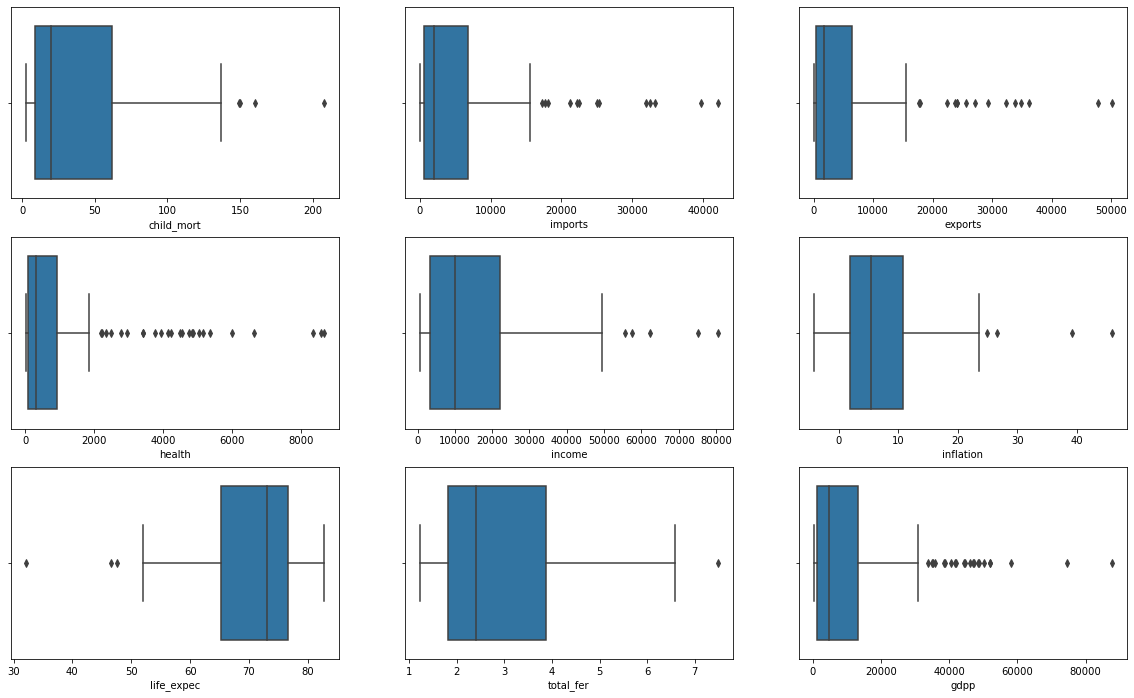

In [27]:
plt.figure(figsize = [20,12])

plt.subplot(3,3,1)
sns.boxplot(country['child_mort'])

plt.subplot(3,3,2)
sns.boxplot(country['imports'])

plt.subplot(3,3,3)
sns.boxplot(country['exports'])

plt.subplot(3,3,4)
sns.boxplot(country['health'])

plt.subplot(3,3,5)
sns.boxplot(country['income'])

plt.subplot(3,3,6)
sns.boxplot(country['inflation'])

plt.subplot(3,3,7)
sns.boxplot(country['life_expec'])

plt.subplot(3,3,8)
sns.boxplot(country['total_fer'])

plt.subplot(3,3,9)
sns.boxplot(country['gdpp'])
plt.show()

# 5. Scaling the numeric Data 

In [28]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [29]:
scaler = StandardScaler()
num_vars = country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]
country_scaled = scaler.fit_transform(num_vars)
country_scaled = pd.DataFrame(country_scaled)
country_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.303466,-0.617617,-0.562023,-0.648685,-0.892037,0.289329,-1.612381,1.911315,-0.702455
1,-0.545781,-0.496897,-0.431204,-0.422310,-0.367608,-0.370665,0.666389,-0.870331,-0.483620
2,-0.276937,-0.434045,-0.478624,-0.498742,-0.180401,1.177320,0.689063,-0.043175,-0.460727
3,2.027084,-0.380154,-0.528049,-0.483915,-0.621628,2.017312,-1.170232,2.138116,-0.518267
4,-0.704073,-0.008898,-0.160414,0.254178,0.210399,-0.777327,0.723074,-0.550142,0.018150


# 6. Using KMeans Algorithm to form cluseters, we have used the elbow method and silhouette analysis to choose the optimal no of clusters 

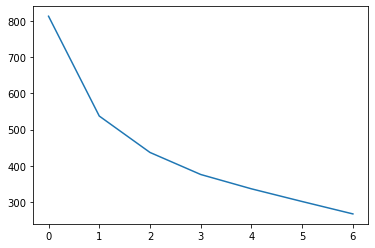

In [30]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scaled)

    ssd.append(kmeans.inertia_)
plt.plot(ssd)
plt.show()

In [31]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
   
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scaled)
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(country_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.47582164792275383
For n_clusters=3, the silhouette score is 0.3990749120733062
For n_clusters=4, the silhouette score is 0.38811074109023863
For n_clusters=5, the silhouette score is 0.34040677710872025
For n_clusters=6, the silhouette score is 0.29660242260487757
For n_clusters=7, the silhouette score is 0.3038873835072067
For n_clusters=8, the silhouette score is 0.28484679230546084


### From elbow method and Silhouette analysis we can choose clusters numbers as 3 or 4 for further analysis
### choosing cluster no as 3 or 4 is good from business perspective. Hence we shall choose the value of K as 3
For the ease for dividing the countries as developed , develping and under developed we are picking n_clusters as 3

In [32]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(country_scaled)

KMeans(max_iter=50, n_clusters=3)

In [33]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2,
       0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [34]:
country['cluster_id'] = kmeans.labels_

In [35]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


### Taking a count of all countries cluster wise

In [36]:
country['cluster_id'].value_counts()

1    89
0    47
2    27
Name: cluster_id, dtype: int64

### We will plot the box plot to infer about the type of the country from the clusters

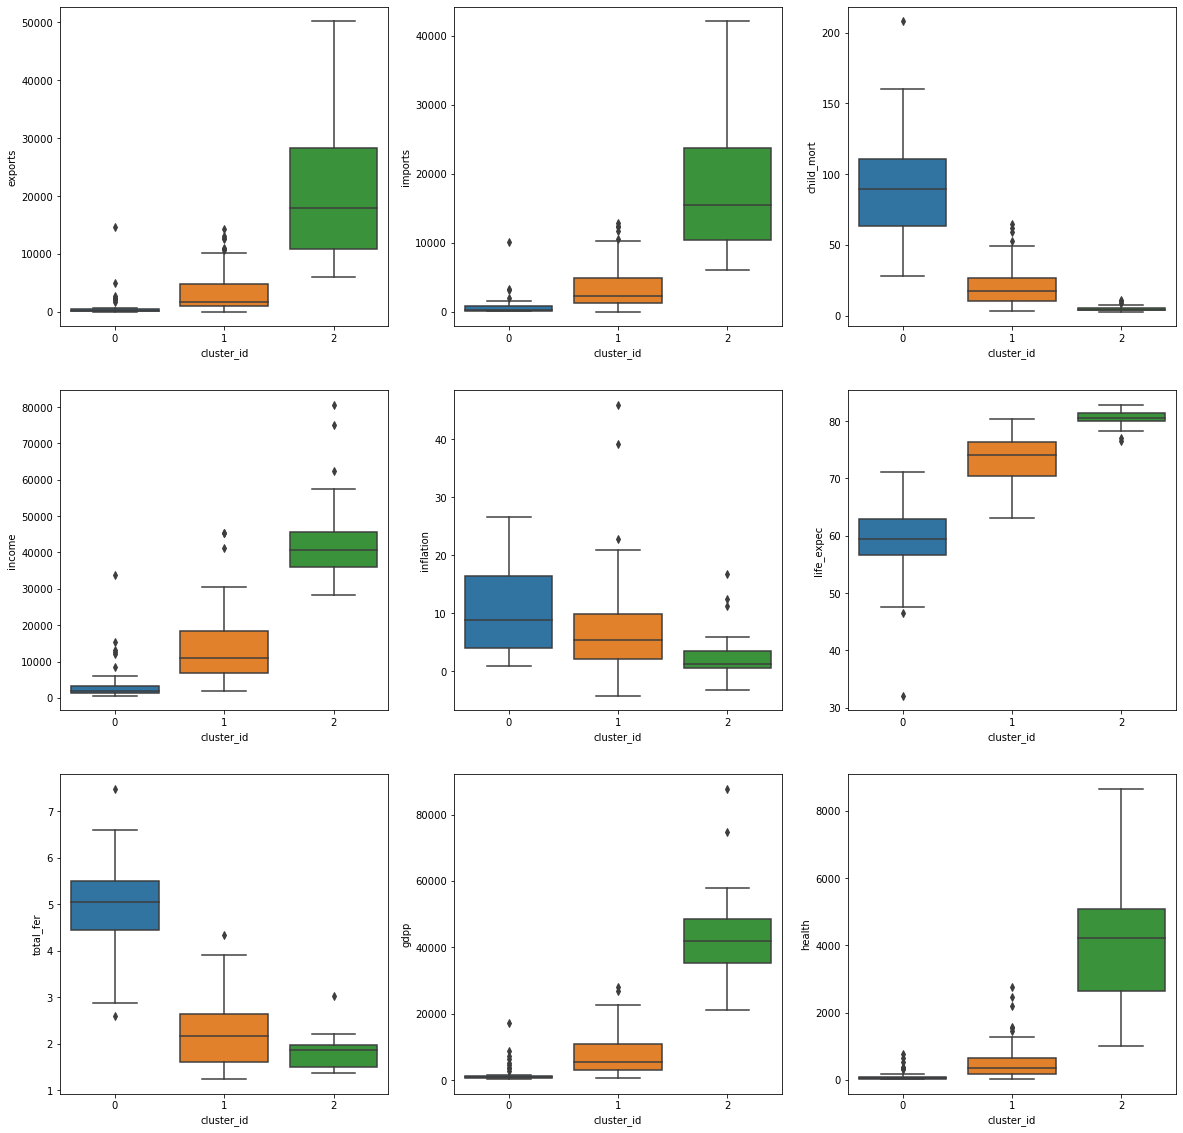

In [37]:
plt.figure(figsize=[20,20])
plt.subplot(3,3,1)
sns.boxplot(x = 'cluster_id', y = 'exports', data = country)
plt.subplot(3,3,2)
sns.boxplot(x = 'cluster_id', y = 'imports', data = country)
plt.subplot(3,3,3)
sns.boxplot(x = 'cluster_id', y = 'child_mort', data = country)
plt.subplot(3,3,4)
sns.boxplot(x = 'cluster_id', y = 'income', data = country)
plt.subplot(3,3,5)
sns.boxplot(x = 'cluster_id', y = 'inflation', data = country)
plt.subplot(3,3,6)
sns.boxplot(x = 'cluster_id', y = 'life_expec', data = country)
plt.subplot(3,3,7)
sns.boxplot(x = 'cluster_id', y = 'total_fer', data = country)
plt.subplot(3,3,8)
sns.boxplot(x = 'cluster_id', y = 'gdpp', data = country)
plt.subplot(3,3,9)
sns.boxplot(x = 'cluster_id', y = 'health', data = country)
plt.show()

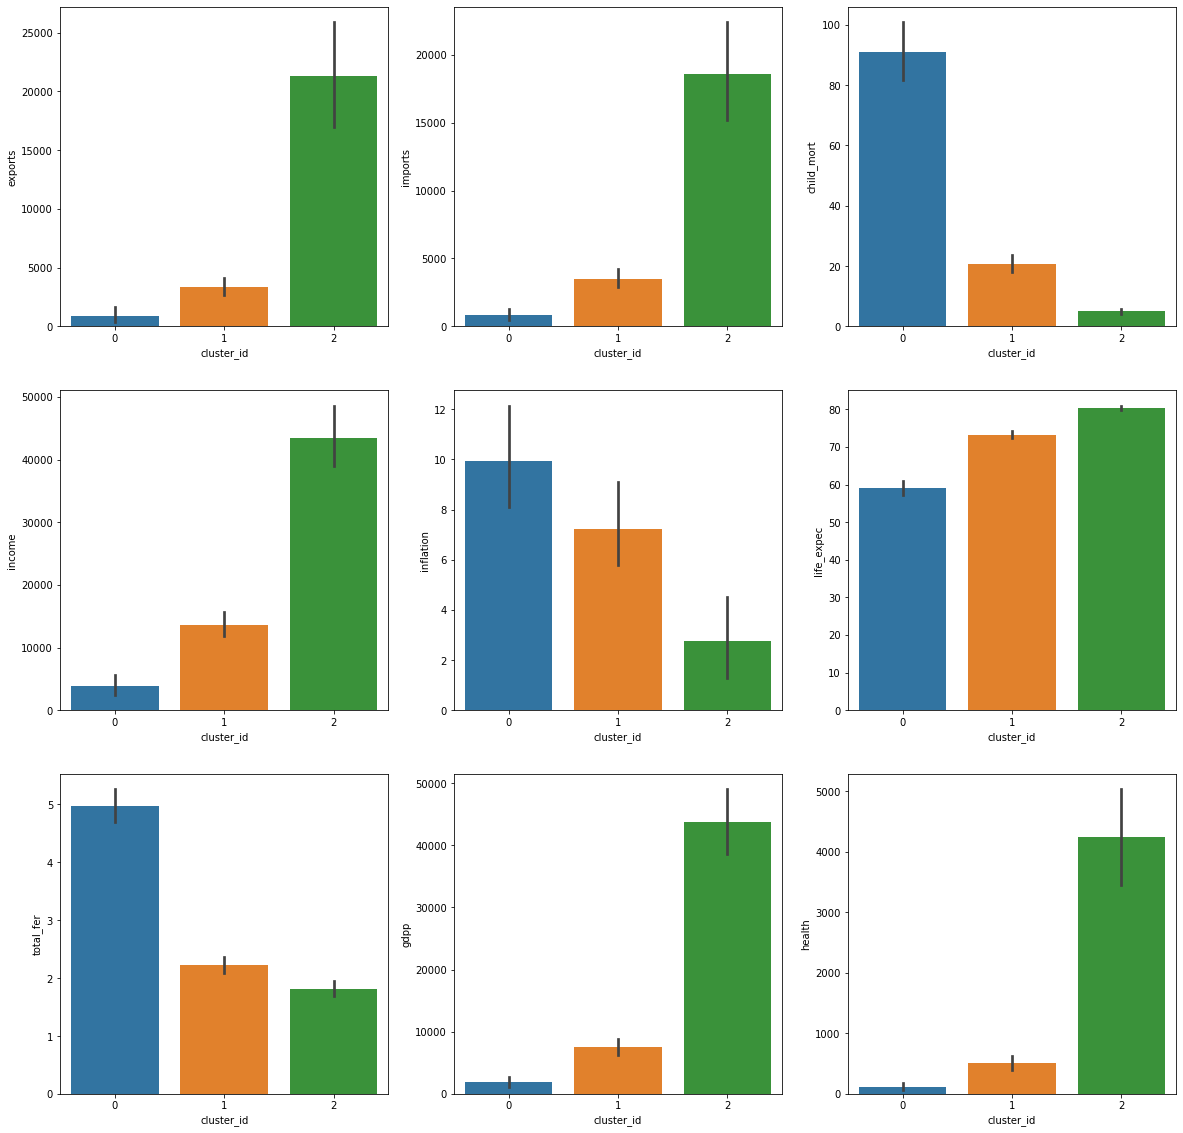

In [38]:
plt.figure(figsize=[20,20])
plt.subplot(3,3,1)
sns.barplot(x = 'cluster_id', y = 'exports', data = country)
plt.subplot(3,3,2)
sns.barplot(x = 'cluster_id', y = 'imports', data = country)
plt.subplot(3,3,3)
sns.barplot(x = 'cluster_id', y = 'child_mort', data = country)
plt.subplot(3,3,4)
sns.barplot(x = 'cluster_id', y = 'income', data = country)
plt.subplot(3,3,5)
sns.barplot(x = 'cluster_id', y = 'inflation', data = country)
plt.subplot(3,3,6)
sns.barplot(x = 'cluster_id', y = 'life_expec', data = country)
plt.subplot(3,3,7)
sns.barplot(x = 'cluster_id', y = 'total_fer', data = country)
plt.subplot(3,3,8)
sns.barplot(x = 'cluster_id', y = 'gdpp', data = country)
plt.subplot(3,3,9)
sns.barplot(x = 'cluster_id', y = 'health', data = country)
plt.show()

## Cluster Profiling 

### Categorising the countries on the basis of the clusters 
#### 1. Cluster 0 -- Under Developed
#### 2. Cluster 1 -- Developing
#### 3. Cluster 2 -- Developed

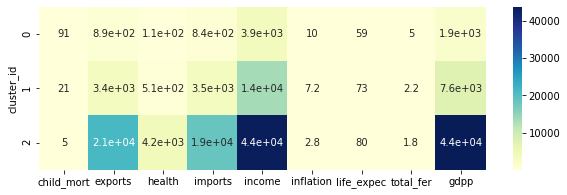

In [52]:
plt.figure(figsize = [10,3])
sns.heatmap(country.groupby('cluster_id').mean(), cmap = 'YlGnBu', annot = True)
plt.show()

### Inferences:
1. Mean income and GDPP for developed countries is quite higher than those of developing and under developed
2. Life expectancy of under developed countries is almost 14 years less than those of others 
3. child mortality rates is much higher in under developed countries

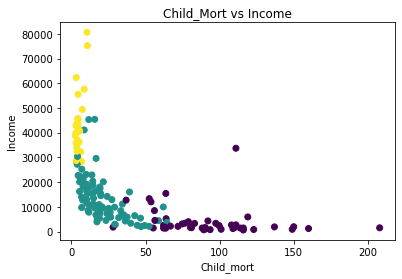

In [53]:
plt.scatter(country['child_mort'], country['income'], c= country['cluster_id'])
plt.title("Child_Mort vs Income")
plt.xlabel('Child_mort')
plt.ylabel('Income')
plt.show()

### Inferences:
1. Countries where income is high the child mortality is low and trend is vice versa for under developed nations

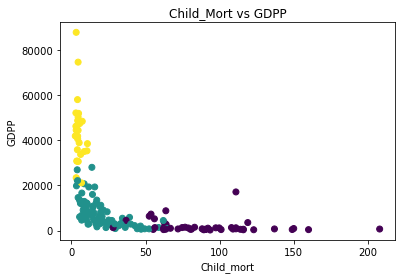

In [54]:
plt.scatter(country['child_mort'], country['gdpp'], c= country['cluster_id'])
plt.title("Child_Mort vs GDPP")
plt.xlabel('Child_mort')
plt.ylabel('GDPP')
plt.show()

### Inferences:
1. Countries where GDPP is high the child mortality is low and trend is vice versa for under developed nations

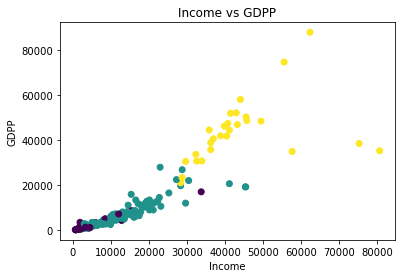

In [55]:
plt.scatter(country['income'], country['gdpp'], c= country['cluster_id'])
plt.title("Income vs GDPP")
plt.xlabel('Income')
plt.ylabel('GDPP')
plt.show()

### Inferences:
1. Countries where GDPP is high the Income is high and trend is vice versa for under developed nations

In [56]:
under_developed = country.loc[country['cluster_id']==0]
under_developed = under_developed.sort_values(by = 'gdpp', ascending = True)
under_developed = under_developed.sort_values(by = 'income', ascending = False)
under_developed = under_developed.sort_values(by = 'child_mort', ascending = False)
under_developed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,0


In [57]:
developing = country.loc[country['cluster_id']==1]
developing

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
1,Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200,1
5,Argentina,14.5,1946.70,834.300,1648.00,18700,20.90,75.8,2.37,10300,1
6,Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220,1
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,3129.70,993.650,3022.60,17100,4.91,76.4,2.08,11900,1
161,Uzbekistan,36.3,437.46,80.178,393.30,4240,16.50,68.8,2.34,1380,1
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,3847.50,662.850,2376.00,16500,45.90,75.4,2.47,13500,1


In [58]:
developed = country.loc[country['cluster_id']==2]
developed

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,2
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,2
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,2
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,2
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800,2
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,2
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,2
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,2
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,2


# As per the KMeans clustering results five countries which are in dire need to help are 

1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali

# 7. Plotting the Dendrogram using bith Single and Complete Linkage method

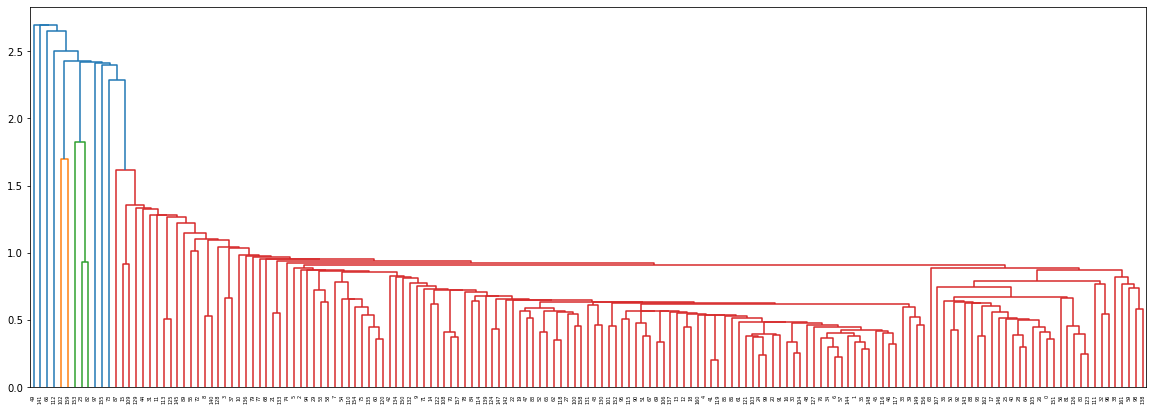

In [59]:
plt.figure(figsize = [20,7])
mergings = linkage(country_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

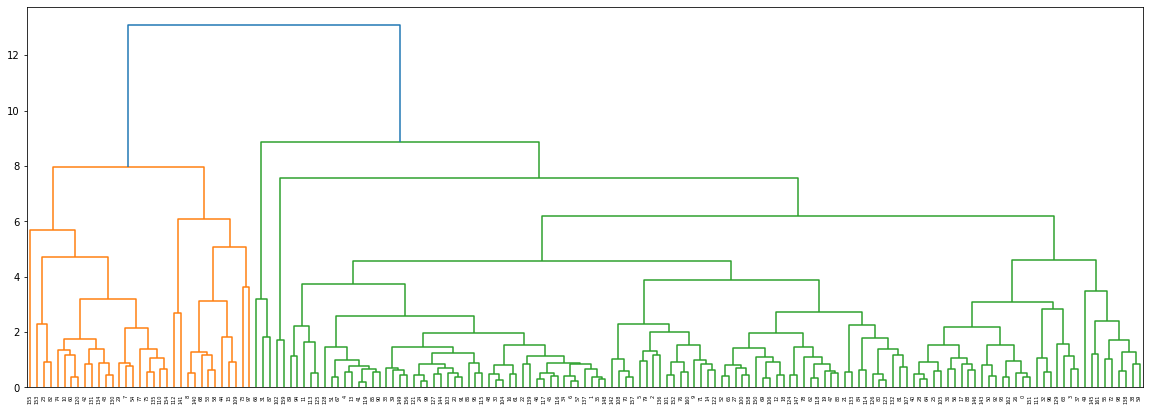

In [60]:
plt.figure(figsize = [20,7])
mergings_2 = linkage(country_scaled, method="complete", metric='euclidean')
dendrogram(mergings_2)
plt.show()

In [61]:
cluster_labels = cut_tree(mergings_2, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,
       3, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 4, 0, 0, 0])

In [62]:
country['cluster_id'] = cluster_labels
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [63]:
country.cluster_id.value_counts()

0    125
1     21
2     12
3      3
4      2
Name: cluster_id, dtype: int64

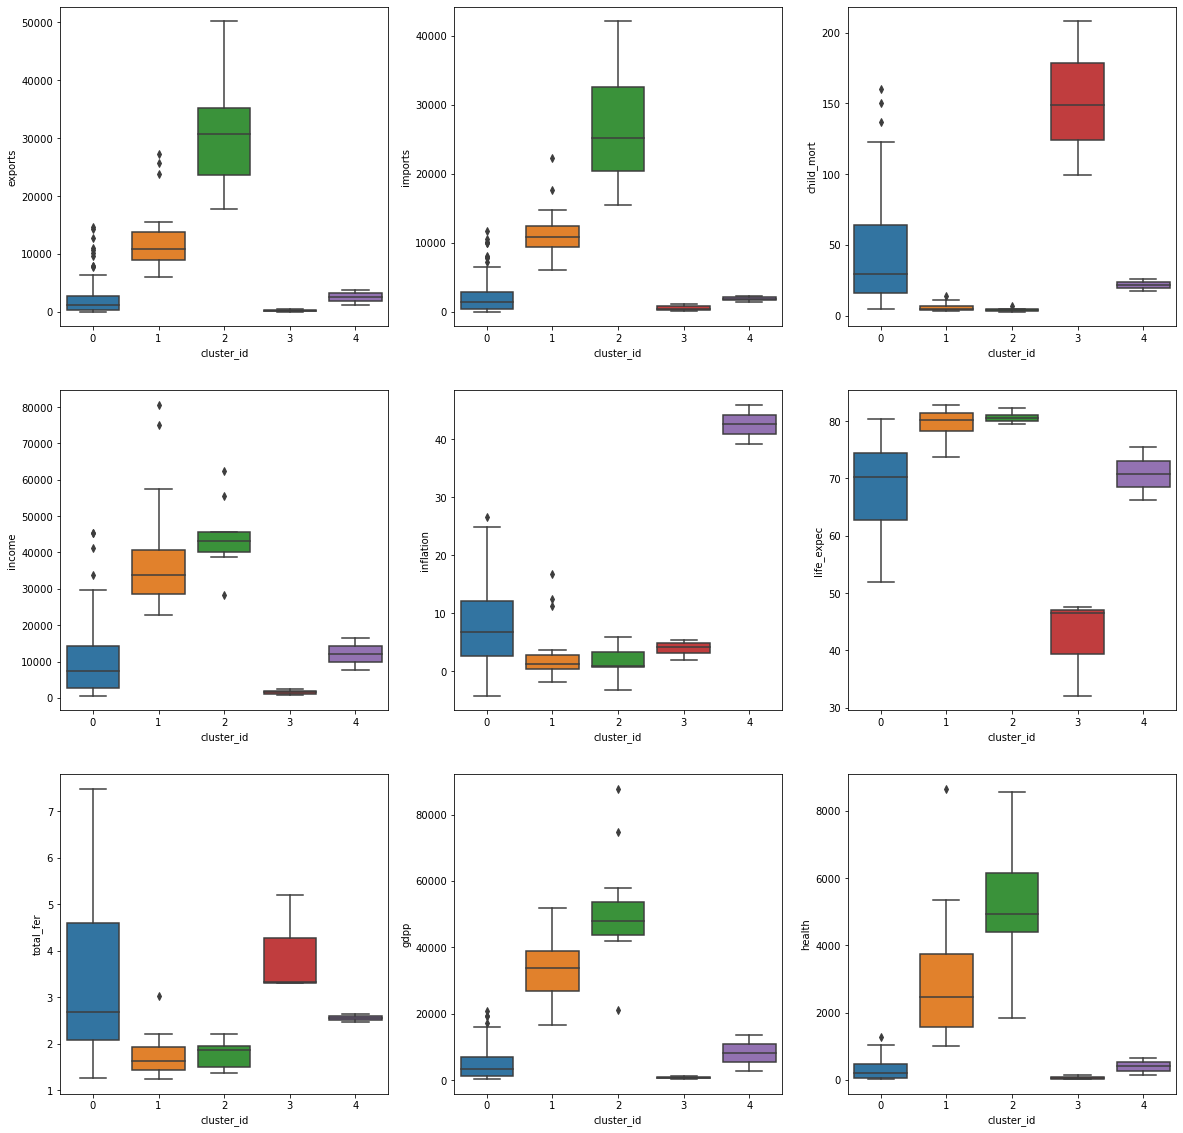

In [64]:
plt.figure(figsize=[20,20])
plt.subplot(3,3,1)
sns.boxplot(x = 'cluster_id', y = 'exports', data = country)
plt.subplot(3,3,2)
sns.boxplot(x = 'cluster_id', y = 'imports', data = country)
plt.subplot(3,3,3)
sns.boxplot(x = 'cluster_id', y = 'child_mort', data = country)
plt.subplot(3,3,4)
sns.boxplot(x = 'cluster_id', y = 'income', data = country)
plt.subplot(3,3,5)
sns.boxplot(x = 'cluster_id', y = 'inflation', data = country)
plt.subplot(3,3,6)
sns.boxplot(x = 'cluster_id', y = 'life_expec', data = country)
plt.subplot(3,3,7)
sns.boxplot(x = 'cluster_id', y = 'total_fer', data = country)
plt.subplot(3,3,8)
sns.boxplot(x = 'cluster_id', y = 'gdpp', data = country)
plt.subplot(3,3,9)
sns.boxplot(x = 'cluster_id', y = 'health', data = country)
plt.show()

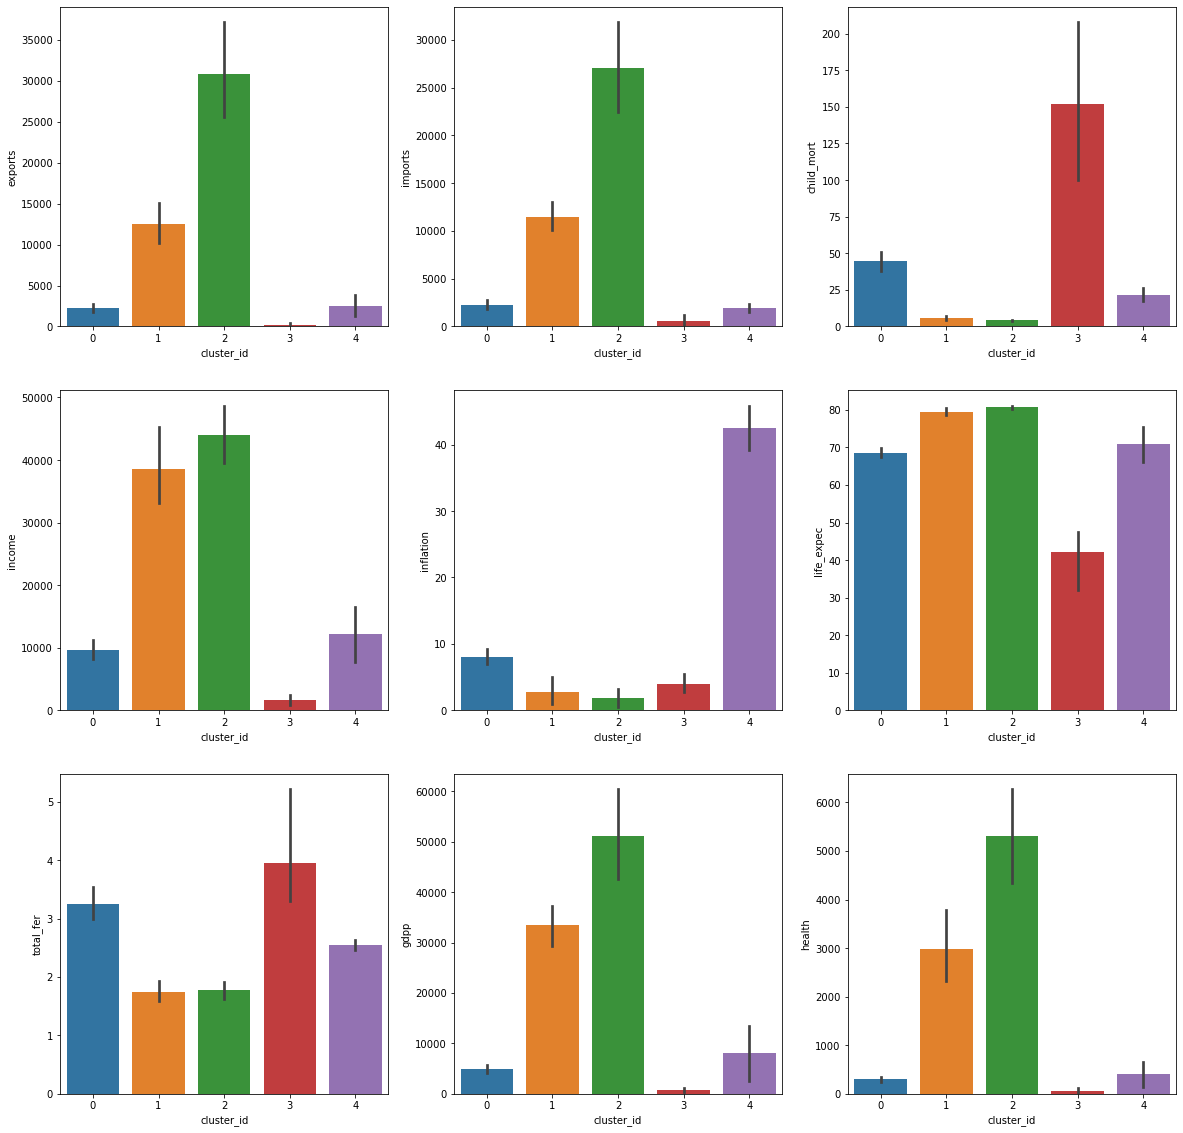

In [65]:
plt.figure(figsize=[20,20])
plt.subplot(3,3,1)
sns.barplot(x = 'cluster_id', y = 'exports', data = country)
plt.subplot(3,3,2)
sns.barplot(x = 'cluster_id', y = 'imports', data = country)
plt.subplot(3,3,3)
sns.barplot(x = 'cluster_id', y = 'child_mort', data = country)
plt.subplot(3,3,4)
sns.barplot(x = 'cluster_id', y = 'income', data = country)
plt.subplot(3,3,5)
sns.barplot(x = 'cluster_id', y = 'inflation', data = country)
plt.subplot(3,3,6)
sns.barplot(x = 'cluster_id', y = 'life_expec', data = country)
plt.subplot(3,3,7)
sns.barplot(x = 'cluster_id', y = 'total_fer', data = country)
plt.subplot(3,3,8)
sns.barplot(x = 'cluster_id', y = 'gdpp', data = country)
plt.subplot(3,3,9)
sns.barplot(x = 'cluster_id', y = 'health', data = country)
plt.show()

### Categorising the countries on the basis of the clusters
1. Cluster 0 -- Under Developed
2. Cluster 1 -- Developing
3. Cluster 2 -- Developed
4. Cluster 3 -- Under Developed
5. Cluster 4 -- Under Developed

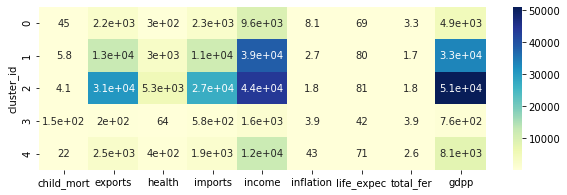

In [75]:
plt.figure(figsize = [10,3])
sns.heatmap(country.groupby('cluster_id').mean(), cmap = 'YlGnBu', annot = True)
plt.show()

### Inefernces:
1. Child mortality in under developed countries is much lower than the others 
2. Mean income and GDPP is much higher in developed nations than others

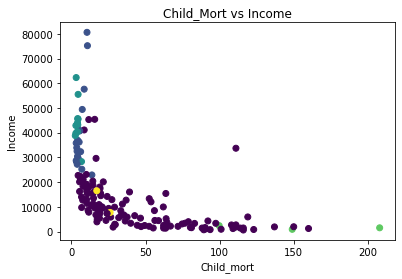

In [77]:
plt.scatter(country['child_mort'], country['income'], c= country['cluster_id'])
plt.title("Child_Mort vs Income")
plt.xlabel('Child_mort')
plt.ylabel('Income')
plt.show()

### Inferences:
1. Countries where Income is high the child_mort is low and trend is vice versa for under developed nations

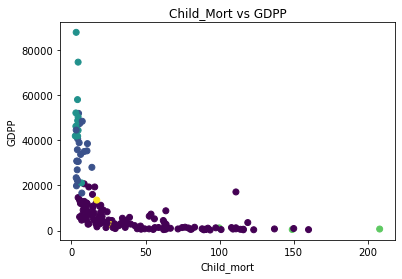

In [78]:
plt.scatter(country['child_mort'], country['gdpp'], c= country['cluster_id'])
plt.title("Child_Mort vs GDPP")
plt.xlabel('Child_mort')
plt.ylabel('GDPP')
plt.show()

### Inferences:
1. Countries where GDPP is high the child_mort is low and trend is vice versa for under developed nations

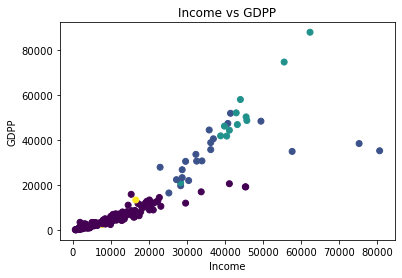

In [79]:
plt.scatter(country['income'], country['gdpp'], c= country['cluster_id'])
plt.title("Income vs GDPP")
plt.xlabel('Income')
plt.ylabel('GDPP')
plt.show()

### Inferences:
1. Countries where GDPP is high the Income is high and trend is vice versa for under developed nations

In [66]:
country_0 = country.loc[country['cluster_id']==0]
country_1 = country.loc[country['cluster_id']==1]
country_2 = country.loc[country['cluster_id']==2]
country_3 = country.loc[country['cluster_id']==3]
country_4 = country.loc[country['cluster_id']==4]

In [67]:
under_developed = pd.merge(country_0,country_4, how = 'outer')
under_developed = pd.merge(under_developed,country_3, how = 'outer')
under_developed = under_developed.sort_values(by = 'gdpp', ascending = True)
under_developed = under_developed.sort_values(by = 'income', ascending = False)
under_developed = under_developed.sort_values(by = 'child_mort', ascending = False)
under_developed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
128,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,3
101,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,0
25,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,0
127,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,3
74,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,0


In [68]:
developed = country_2
developed

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,2
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,2
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,2
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,2
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,2
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900,2
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700,2
98,Malta,6.8,32283.0,1825.15,32494.0,28300,3.830,80.3,1.36,21100,2
110,Netherlands,4.5,36216.0,5985.70,31990.8,45500,0.848,80.7,1.79,50300,2
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800,2


In [69]:
developing = country_1
developing 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,1
10,Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000,1
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,1
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,1
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800,1
43,Czech Republic,3.4,13068.0,1560.24,12454.2,28300,-1.430,77.5,1.51,19800,1
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,1
60,Greece,3.9,5944.9,2770.70,8258.3,28700,0.673,80.4,1.48,26900,1
74,Israel,4.6,10710.0,2334.78,10067.4,29600,1.770,81.4,3.03,30600,1
75,Italy,4.0,9021.6,3411.74,9737.6,36200,0.319,81.7,1.46,35800,1


# As per the Hierarchical clustering results five countries which are in dire need to help are 

1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali